In [528]:
import timeit
import random
import copy
from typing import no_type_check_decorator

In [529]:
META = [[1,2,3],[4,5,6],[7,8,0]]

In [530]:
class No:
  def __init__(self, estado, nopai, g, h):
    self.estado = estado
    self.pai = nopai
    self.g = g
    self.h = h
    
  def __eq__(self, outro):
    return self.estado == outro.estado
 
  def __repr__(self):
    return str(self.estado)
  
  def getState(self):
    return self.estado
    

In [531]:
def solucionavel(lista):
  inversoes = 0
  for i,e in enumerate(lista):
    if e == 0:
      continue
    for j in range(i+1, len(lista)):
      if lista[j] == 0:
        continue
      if e > lista[j]:
        inversoes += 1
  if inversoes % 2 == 1:
    return False
  else:
    return True

In [532]:
def geraInicial(st=META[:]):
  lista = [j for i in st for j in i]
  while True:
    random.shuffle(lista)
    st = [lista[:3]] + [lista[3:6]]+[lista[6:]]
    if solucionavel(lista) and st != META: return st
  return 0

In [533]:
##geraInicial()

In [534]:
def localizar(estado, elemento = 0):
  for i in range(3):
    for j in range(3):
      if estado[i][j] == elemento:
        linha = i 
        coluna = j
        return linha, coluna

In [535]:
def distanciaQuarteirao(st1, st2):
  dist = 0
  fora = 0
  for i in range(3):
    for j in range(3):
      if st1[i][j] == 0:
        continue
      i2, j2 = localizar(st2, st1[i][j])
      if i2 != i or j2 != j: fora += 1
      dist += abs(i2 - i) + abs(j2 - j)
  return dist + fora 

In [536]:
def criarNo(estado, pai, g = 0):
  h = g + distanciaQuarteirao(estado, META)
  return No(estado, pai, g, h)

In [537]:
def inserirNo(no, fronteira):
  if no in fronteira:
    return fronteira
  fronteira.append(no)
  chave = fronteira[-1]
  j = len(fronteira)-2
  while fronteira[j].h > chave.h and j >= 0:
    fronteira[j+1] = fronteira[j]
    fronteira[j] = chave
    j -= 1
  return fronteira

In [538]:
def moverAbaixo(estado):
  linha, coluna = localizar(estado)
  if linha < 2:
    estado[linha + 1][coluna], estado[linha][coluna] = estado[linha][coluna], estado[linha+1][coluna]
  return estado


def moverAcima(estado):
  linha, coluna = localizar(estado)
  if linha > 0:
    estado[linha - 1][coluna], estado[linha][coluna] = estado[linha][coluna], estado[linha - 1][
      coluna]
  return estado


def moverDireita(estado):
  linha, coluna = localizar(estado)
  if coluna < 2:
    estado[linha][coluna + 1], estado[linha][coluna] = estado[linha][coluna], estado[linha][
      coluna + 1]
  return estado


def moverEsquerda(estado):
  linha, coluna = localizar(estado)
  if coluna > 0:
    estado[linha][coluna - 1], estado[linha][coluna] = estado[linha][coluna], estado[linha][
      coluna - 1]
  return estado

In [539]:
def sucessor(no):
  estado = no.estado
  pai = no.pai
  if pai:
    estadoPai = pai.estado
  else:
    estadoPai = None
    
  listaS = []
  
  l1 = moverAcima(copy.deepcopy(estado))
  if l1 != estado:
    listaS.append(l1)
    
  l2 = moverDireita(copy.deepcopy(estado))
  if l2 != estado:
    listaS.append(l2)
    
  l3 = moverAbaixo(copy.deepcopy(estado))
  if l3 != estado:
    listaS.append(l3)
    
  l4 = moverEsquerda(copy.deepcopy(estado))
  if l4 != estado:
    listaS.append(l4)
    
  return listaS

In [540]:
def busca(max, noInicio):
  print(noInicio, ":")
  nmov = 0
  borda = [noInicio]
  while borda:
    no = borda.pop(0)
    if no.estado == META:
      sol = []
      while True:
        sol.append(no.estado)
        no = no.pai
        if not no: break
      sol.reverse()
      return sol, nmov
    
    nmov += 1

    if (nmov%(max/10)) == 0: print(nmov, end = "....")
    if nmov > max: break
    sucs = sucessor(no)
    for s in sucs:
      inserirNo(criarNo(s, no, no.g+1), borda)
  return 0, nmov

In [541]:
def puzzle(maxD, nAmostras):
  tempos = []
  solucionados =[]
  solucoes = []
  naoSolucionados = []
  nS = 0
  nNs = 0
  
  for i in range(nAmostras):
    noInicial = criarNo(geraInicial(), None)
    start_time = timeit.default_timer()
    res, nmov = busca(maxD, noInicial)
    tempo = timeit.default_timer() - start_time
    if res:
      solucoes.append(res)
      print("\nSolucionado em {} segundos e {} movimentos".format(tempo, nmov))
      tempos.append(tempo)
      solucionados.append((noInicial.estado, nmov))
      nS += 1
    else:
      print("\nFalhou em {} segundos e {} movimentos".format(tempo, nmov))
      naoSolucionados.append((noInicial.estado, nmov))
      tempos.append(None)
      nNs += 1
  print("Solucionados {} e não solucionados {}".format(nS, nNs))
  return tempos, solucionados, naoSolucionados, nS, nNs
  

In [542]:
sol = puzzle(3000, 10)

[[6, 8, 2], [3, 7, 1], [4, 0, 5]] :
300....600....900....
Solucionado em 0.6358753829990746 segundos e 996 movimentos
[[0, 7, 6], [3, 5, 4], [8, 1, 2]] :
300....
Solucionado em 0.12172958000155631 segundos e 381 movimentos
[[8, 0, 5], [2, 7, 1], [4, 6, 3]] :

Solucionado em 0.039477701000578236 segundos e 144 movimentos
[[7, 8, 6], [5, 0, 3], [2, 1, 4]] :
300....600....900....1200....1500....1800....2100....
Solucionado em 2.895305723999627 segundos e 2329 movimentos
[[3, 5, 4], [1, 0, 8], [7, 2, 6]] :
300....600....
Solucionado em 0.28181374999985565 segundos e 643 movimentos
[[8, 6, 5], [0, 3, 7], [2, 1, 4]] :
300....600....900....1200....1500....
Solucionado em 2.496896115000709 segundos e 1695 movimentos
[[3, 8, 0], [1, 7, 2], [4, 5, 6]] :
300....600....900....1200....1500....1800....
Solucionado em 2.094738439998764 segundos e 1973 movimentos
[[2, 7, 0], [1, 3, 5], [6, 4, 8]] :
300....600....900....
Solucionado em 0.49934722400212195 segundos e 948 movimentos
[[7, 4, 8], [6, 0, 2]

In [543]:
import matplotlib as mpl
import matplotlib.pyplot as plt

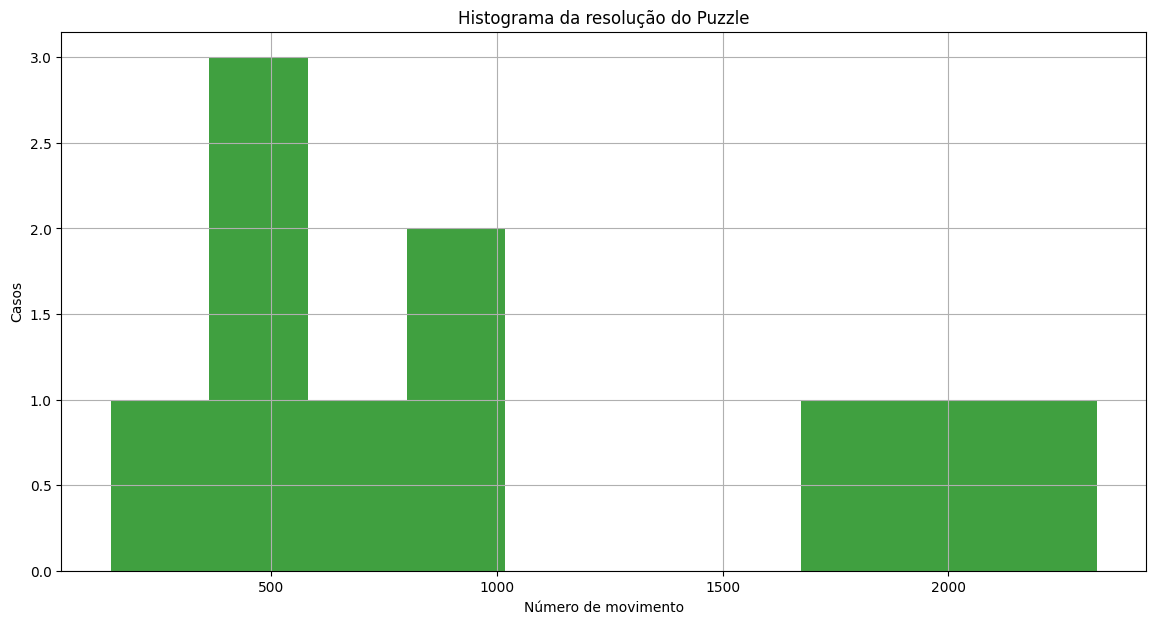

In [544]:
a, b, f, x, y = sol
movimentos =[i[1] for i in b]
plt.rcParams['figure.figsize'] = [14,7]
n, b, p = plt.hist(movimentos, 10, facecolor = 'g', alpha = 0.75)
plt.xlabel('Número de movimento')
plt.ylabel('Casos')
plt.title('Histograma da resolução do Puzzle')
plt.grid(True)
plt.show()

[[0, 4, 3], [8, 7, 2], [6, 5, 1]] :

Solucionado em 0.7639317379980639 segundos e 1427 movimentos
[[0, 1, 5], [8, 6, 4], [7, 3, 2]] :
1500....
Solucionado em 0.9166966319971834 segundos e 1593 movimentos
[[2, 8, 6], [0, 5, 1], [3, 4, 7]] :

Solucionado em 0.6029680430001463 segundos e 1463 movimentos
[[1, 3, 8], [2, 7, 4], [0, 6, 5]] :

Solucionado em 0.04372245300328359 segundos e 261 movimentos
[[1, 6, 2], [8, 3, 5], [0, 7, 4]] :
1500....
Solucionado em 0.9378507020010147 segundos e 1996 movimentos
[[6, 5, 8], [3, 0, 1], [2, 4, 7]] :

Solucionado em 0.04329872699963744 segundos e 249 movimentos
[[5, 2, 8], [3, 1, 7], [6, 0, 4]] :

Solucionado em 0.020868597999651683 segundos e 146 movimentos
[[4, 1, 5], [8, 0, 2], [3, 7, 6]] :

Solucionado em 0.0039945419994182885 segundos e 38 movimentos
[[5, 2, 6], [3, 8, 4], [7, 1, 0]] :
1500....
Solucionado em 1.8373353650022182 segundos e 2751 movimentos
[[1, 5, 0], [3, 6, 2], [7, 8, 4]] :

Solucionado em 0.04592655799933709 segundos e 310 movim

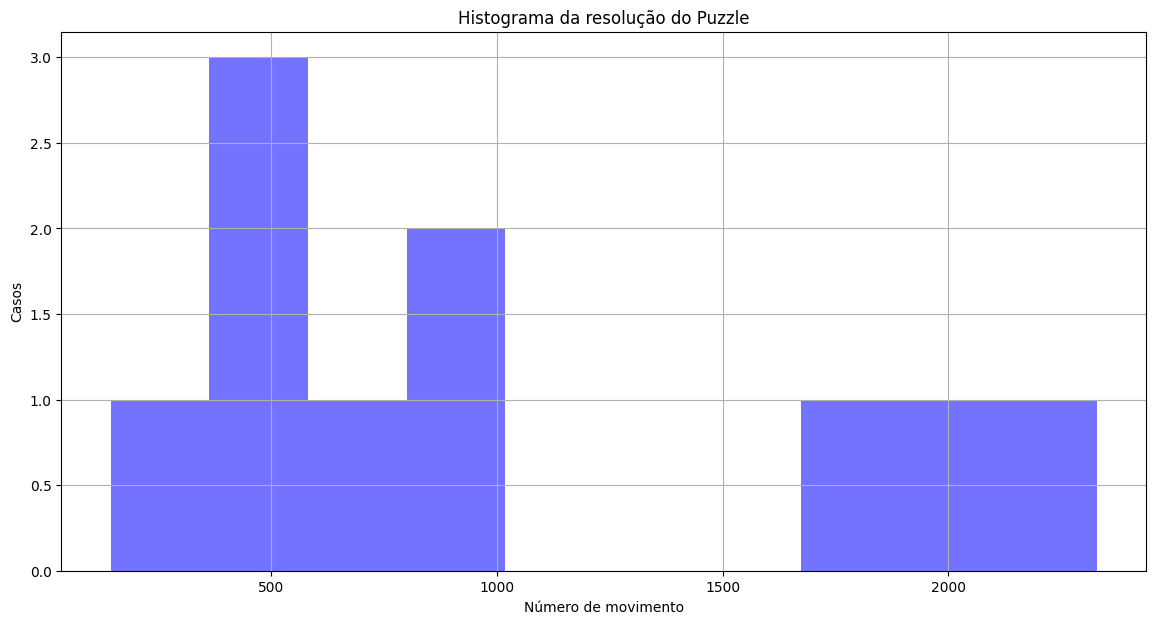

In [545]:
a, b, c, d, e = puzzle(15000, 100)
n, b, p = plt.hist(movimentos, 10, facecolor = 'b', alpha = 0.55, label = 'Movimentos')
plt.xlabel('Número de movimento')
plt.ylabel('Casos')
plt.title('Histograma da resolução do Puzzle')
plt.grid(True)
plt.show()